In [5]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [52]:
dataset_name = 'SmallNorb'

In [53]:
import tensorflow_datasets as tfds

In [3]:
import numpy as np
#from keras.datasets import mnist
#(X, y), (X_test, y_test) = mnist.load_data()
smallNorb= tfds.load("smallnorb",with_info=False)


   

#X = np.concatenate((X, X_test))
#y = np.concatenate((y, y_test))
#imgs = X
#del X_test
#del y_test

#print('Dataset size {}'.format(X.shape))


W0721 18:03:18.751166 11116 deprecation.py:323] From c:\users\azeghost\miniconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_datasets\core\file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset smallnorb downloaded and prepared to C:\Users\AzeGhost\tensorflow_datasets\smallnorb\0.1.0. Subsequent calls will reuse this data.


W0721 18:04:14.691492 11116 deprecation.py:323] From c:\users\azeghost\miniconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'X' is not defined

In [54]:
print("started loading into Numpy")
train_ds = smallNorb['train'].take(256)
numpy_s = None
x_nurbs = None
for example  in tfds.as_numpy(train_ds): 
  if(numpy_s is None):
    numpy_s= np.array([[example["instance"],example["label_azimuth"],example["label_category"],example['label_elevation'],example['label_lighting']]])
    numpy_s=np.append(numpy_s, [[example["instance"],example["label_azimuth"],example["label_category"],example['label_elevation'],example['label_lighting']]],0)
  else:
    numpy_s=np.append(numpy_s, [[example["instance"],example["label_azimuth"],example["label_category"],example['label_elevation'],example['label_lighting']]],0)
    numpy_s=np.append(numpy_s, [[example["instance"],example["label_azimuth"],example["label_category"],example['label_elevation'],example['label_lighting']]],0)
  if(x_nurbs is None):
    x_nurbs= np.array([example["image"], example["image2"]])
  else:
    x_nurbs=np.append(x_nurbs,[example["image"], example["image2"]],0)

started loading into Numpy


In [55]:
print(numpy_s.shape)
print(x_nurbs.shape)

(512, 5)
(512, 96, 96, 1)


In [56]:
X = x_nurbs
y = numpy_s
img = X
print('Dataset size {}'.format(X.shape))

Dataset size (512, 96, 96, 1)


# AE

In [57]:
%load_ext autoreload
%autoreload 2

In [58]:
from utils.constants import Models as models
from models.AE import AE

In [59]:
ae = AE(model_type=models.VAE, dataset_name=dataset_name,hidden_dim=500, plot=True, isConv=False)

Unable to load previous configuration ...
Saving Model Arguments ...


In [71]:
ae.fit(X,y)


Processing data...
(512, 96, 96, 1)
Scaling dataset ... 
Creating dask array ... 
Preparing samples ...
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 60 doesn't equal dimension 12
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 60 doesn't equal dimension 12
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean 

Boolean array length 60 doesn't equal dimension 12
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 60 doesn't equal dimension 12
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 60 doesn't equal dimension 12
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boolean array length 500 doesn't equal dimension 100
hello
Boo

IndexError: tuple index out of range

In [65]:
ae.run_metrics()

AttributeError: 'AE' object has no attribute 'graph'

In [19]:
from utils.plots import plot_samples, merge
from skimage.transform import resize
import matplotlib.pyplot as plt

Loading model checkpoint experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125
Model loaded
EPOCHS trained:  126
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125
Model loaded
EPOCHS trained:  126
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125
Model loaded
EPOCHS trained:  126
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/AE__MNIST_lat15_h500_lay3/-111125
Model loaded
EPOCHS trained:  126
random sample ba

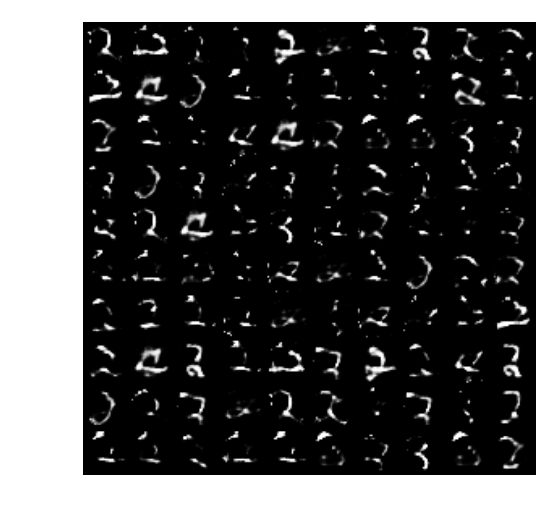

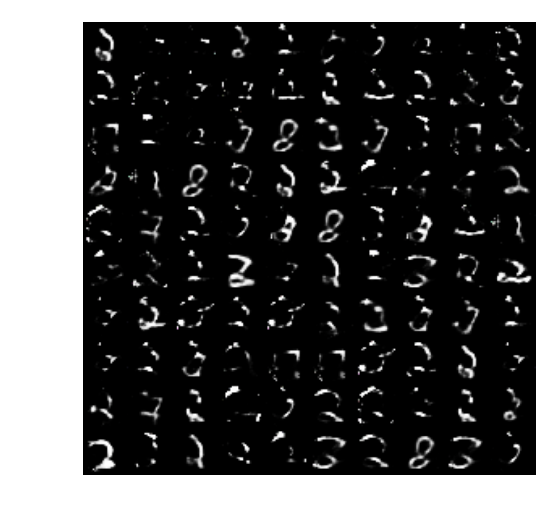

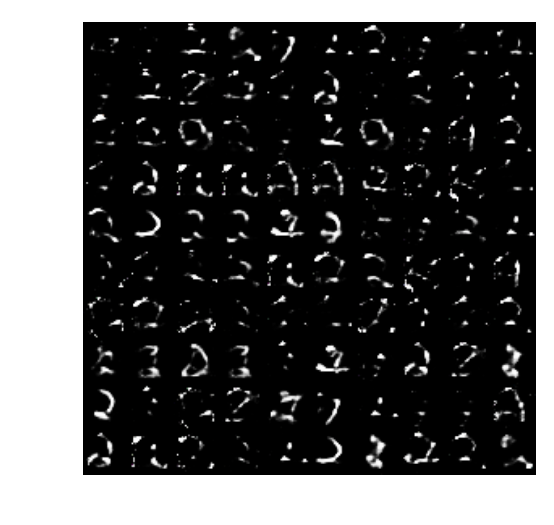

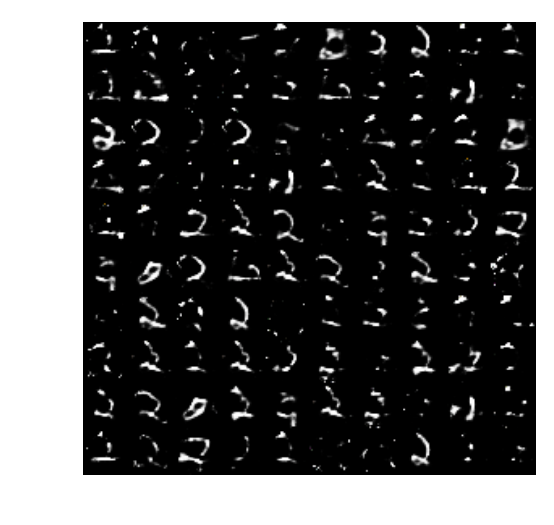

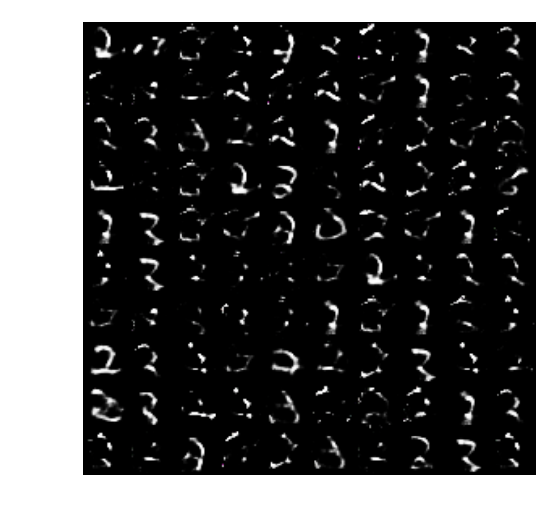

In [9]:
for _ in range(5):
    samples = ae.reconst_samples_out_data()
    scale = 10
    im = merge(samples, (10,10))
    fig_width = int(im.shape[0] * scale)
    fig_height = int(im.shape[1] * scale)
    im = resize(im, (fig_width, fig_height), anti_aliasing=True)
    plt.figure(dpi=150)
    plt.imshow(im)
    plt.axis('off')